<a href="https://colab.research.google.com/github/vdcmathieu/HISP_analysis/blob/main/data_mining_final_project_garance_mathieu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HISP Project

This project was made by Garance Décarsin & Mathieu Van de catsije.

## Library

This code imports the different mandatory library useful for the project. Such as Pandas, Numpy, Seaborn or Scikit.

In [96]:
# Libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import of the Dataset

Import of the original dataset using GitHub. We're using Github to store the csv file with the *HISP* data, then importing it thanks to its raw url and the *read_csv* method from Pandas.

In [61]:
# Import of the dataset from GitHub into a Dataframe variable
import pandas as pd
url = "https://raw.githubusercontent.com/vdcmathieu/hisp_project/main/HISP.csv"
original_data_set = pd.read_csv(url)

In [62]:
# Display of the Dataframe with the original data
original_data_set

,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num
0,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,Before,15.185455,24.0,23,0.0,6.0,0,0,4,1,0,1,124.819966,1
1,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,After,19.580902,25.0,24,0.0,6.0,0,0,4,1,0,1,124.819966,1
2,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,Before,13.076257,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966,1
3,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,After,2.398854,31.0,27,4.0,0.0,0,0,6,1,0,2,124.819966,1
4,26,13,Treatment,Promotion,Eligible,Enrolled,0,54.095825,After,0.000000,59.0,57,0.0,0.0,0,0,6,1,0,4,124.819966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,35,15738,Control,No promotion,Not eligible,Not enrolled,0,59.737247,Before,16.811539,52.0,41,0.0,2.0,0,1,7,0,1,2,162.748811,0
19823,40,15769,Treatment,Promotion,Not eligible,Not enrolled,0,62.055641,Before,15.906003,51.0,40,5.0,2.0,0,1,5,1,1,1,114.763392,0
19824,40,15769,Treatment,Promotion,Not eligible,Not enrolled,0,62.055641,After,8.248152,52.0,41,5.0,2.0,0,1,5,1,1,1,114.763392,0
19825,40,15778,Treatment,Promotion,Not eligible,Not enrolled,0,62.828438,Before,8.737772,58.0,49,3.0,0.0,0,1,9,1,1,4,114.763392,0


<p>The dataset includes a number of important variables you’ll use throughout this assignment:</p>
<table class="table table-condensed">
<colgroup>
<col width="24%">
<col width="75%">
</colgroup>
<thead>
<tr class="header">
<th>Variable name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><code>health_expenditures</code></td>
<td>Out of pocket health expenditures (per person per year)</td>
</tr>
<tr class="even">
<td><code>eligible</code></td>
<td>Household eligible to enroll in HISP</td>
</tr>
<tr class="odd">
<td><code>enrolled</code></td>
<td>Household enrolled in HISP</td>
</tr>
<tr class="even">
<td><code>round</code></td>
<td>Indicator for before and after intervention</td>
</tr>
<tr class="odd">
<td><code>treatment_locality</code></td>
<td>Household is located in treatment community</td>
</tr>
<tr class="even">
<td><code>poverty_index</code></td>
<td>1-100 scale of poverty</td>
</tr>
<tr class="odd">
<td><code>promotion_locality</code></td>
<td>Household is located in community that received random promotion</td>
</tr>
<tr class="even">
<td><code>enrolled_rp</code></td>
<td>Household enrolled in HISP following random promotion</td>
</tr>
</tbody>
</table>
<p>It also includes several demographic variables about the households. <strong>Each of these are backdoor confounders between health expenditures participation in the HISP</strong>:</p>
<table class="table table-condensed">
<thead>
<tr class="header">
<th>Variable name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><code>age_hh</code></td>
<td>Age of the head of household (years)</td>
</tr>
<tr class="even">
<td><code>age_sp</code></td>
<td>Age of the spouse (years)</td>
</tr>
<tr class="odd">
<td><code>educ_hh</code></td>
<td>Education of the head of household (years)</td>
</tr>
<tr class="even">
<td><code>educ_sp</code></td>
<td>Education of the spouse (years)</td>
</tr>
<tr class="odd">
<td><code>female_hh</code></td>
<td>Head of household is a woman (1 = yes)</td>
</tr>
<tr class="even">
<td><code>indigenous</code></td>
<td>Head of household speaks an indigenous language (1 = yes)</td>
</tr>
<tr class="odd">
<td><code>hhsize</code></td>
<td>Number of household members</td>
</tr>
<tr class="even">
<td><code>dirtfloor</code></td>
<td>Home has a dirt floor (1 = yes)</td>
</tr>
<tr class="odd">
<td><code>bathroom</code></td>
<td>Home has a private bathroom (1 = yes)</td>
</tr>
<tr class="even">
<td><code>land</code></td>
<td>Number of hectares of land owned by household</td>
</tr>
<tr class="odd">
<td><code>hospital_distance</code></td>
<td>Distance to closest hospital (km)</td>
</tr>
</tbody>
</table>

## Dataframe cleaning

In [63]:
df = original_data_set

### General information on the dataframe

Use the function `.info()` to get information regarding each column of the dataframe. Thus, we can now focus on the column which need to be patched (mostly the column with an , such as `treatment_locality`.

In [64]:
# Get column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_identifier   19827 non-null  int64  
 1   household_identifier  19827 non-null  int64  
 2   treatment_locality    19827 non-null  object 
 3   promotion_locality    19827 non-null  object 
 4   eligible              19827 non-null  object 
 5   enrolled              19827 non-null  object 
 6   enrolled_rp           19827 non-null  int64  
 7   poverty_index         19827 non-null  float64
 8   round                 19827 non-null  object 
 9   health_expenditures   19827 non-null  float64
 10  age_hh                19827 non-null  float64
 11  age_sp                19827 non-null  int64  
 12  educ_hh               19827 non-null  float64
 13  educ_sp               19827 non-null  float64
 14  female_hh             19827 non-null  int64  
 15  indigenous         

### Adjustement of DType

In [65]:
# Change Dtype of the necessarty column
df.treatment_locality = df.treatment_locality.astype('category')
df.promotion_locality = df.promotion_locality.astype('category')
df.eligible = df.eligible.astype('category')
df.enrolled = df.enrolled.astype('category')
df['round'] = df['round'].astype('category')

In [66]:
# Check that all Dtype has been changed to the correct values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   locality_identifier   19827 non-null  int64   
 1   household_identifier  19827 non-null  int64   
 2   treatment_locality    19827 non-null  category
 3   promotion_locality    19827 non-null  category
 4   eligible              19827 non-null  category
 5   enrolled              19827 non-null  category
 6   enrolled_rp           19827 non-null  int64   
 7   poverty_index         19827 non-null  float64 
 8   round                 19827 non-null  category
 9   health_expenditures   19827 non-null  float64 
 10  age_hh                19827 non-null  float64 
 11  age_sp                19827 non-null  int64   
 12  educ_hh               19827 non-null  float64 
 13  educ_sp               19827 non-null  float64 
 14  female_hh             19827 non-null  int64   
 15  in

## Descriptive Statistics

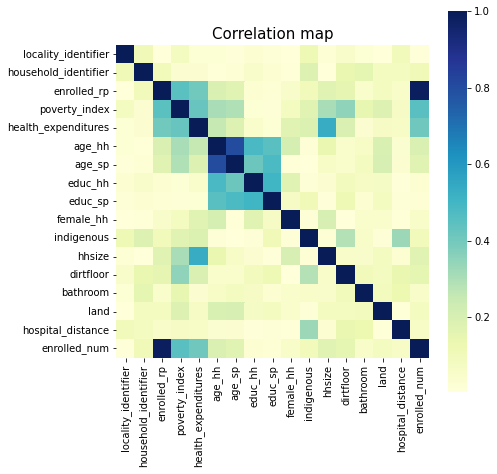

In [67]:
# Create Pearson correlation map to vizualise the different correlation in between the column
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr().abs(), vmax=1., square=True, cmap="YlGnBu")
plt.title("Correlation map", fontsize=15)
plt.show()

In [68]:
corr_pearson = df.corr()
corr_pearson.health_expenditures

locality_identifier    -0.025461
household_identifier   -0.033246
enrolled_rp            -0.406346
poverty_index           0.428248
health_expenditures     1.000000
age_hh                  0.257817
age_sp                  0.184925
educ_hh                -0.051597
educ_sp                -0.027431
female_hh               0.174227
indigenous             -0.189984
hhsize                 -0.536961
dirtfloor              -0.194512
bathroom                0.034342
land                    0.069479
hospital_distance      -0.061036
enrolled_num           -0.412693
Name: health_expenditures, dtype: float64

We observe that some column seem to have a non negligable (> +/- 0.4) impact on the health_expenditures variable. Those are:
*   enrolled_rp: 	**Household enrolled in HISP following random promotion** (-0.4)
*   poverty_index: **1-100 scale of poverty** (0.42)
*   hhsize: **Number of household members** (-0.54)
*   enrolled_num: **Household enrolled in HISP** (-0.41)

The higher the correlation the most positive impact the variable has on the `health_expenditure`, the lowest the correlation (close to -1) the most negative impact it has. Near 0 correlation values have a negligibable impact according to Pearson method (which is a linear correlation method).
Which means that when `enrolled_rp` increase by 1, `health_expediture` decrease 0.4. On the contrary, when `poverty_index` increase by 1 `health_expenditure` increase by 0.42. 

#### Household enrolled in HISP following random promotion

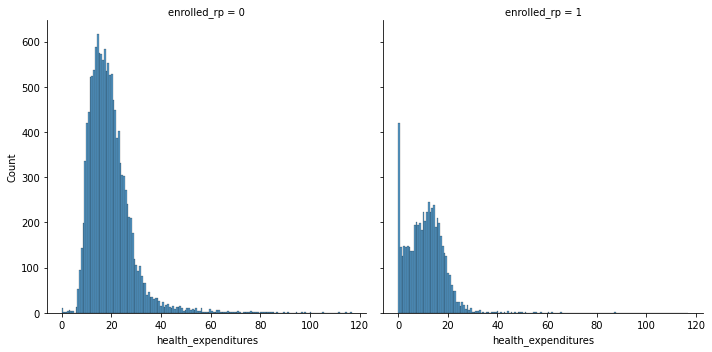

In [69]:
sns.displot(df, x="health_expenditures", kde=False, col="enrolled_rp")

Add plot description.

#### Household enrolled in HISP following random promotion

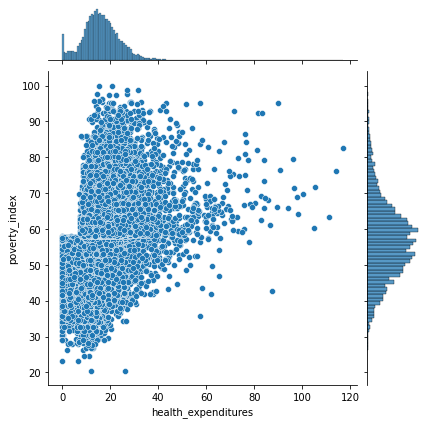

In [70]:
sns.jointplot(x="health_expenditures", y="poverty_index", data=df)

#### Number of household members

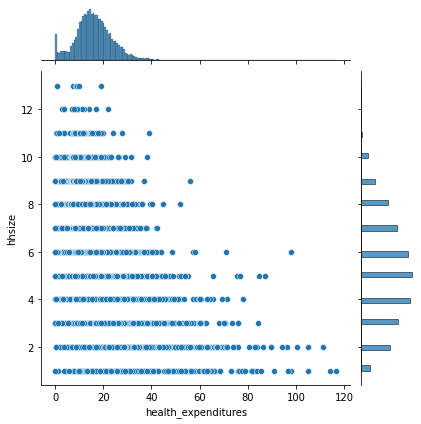

In [71]:
sns.jointplot(x="health_expenditures", y="hhsize", data=df)

#### Household enrolled in HISP

## Split the Dataframe into a training and test sets

### Encoding of the non numerical variables

Non numerical variables need to be encoded into numerical one, so it can be interpreted correctly by a regression.

To do so, we transform categorical data into number. For example, the column `treatment_locality` which countains two uniques values : `Control`& `Treatment` ; can be transformed into one column `Control`with value 0 or 1. If the value is 0, then it correspond to `Treatment` if it is 1, then it is `Control`.

In [72]:
encoded_df = df

##### treatment_locality

In [73]:
encoded_df.treatment_locality = pd.get_dummies(encoded_df.treatment_locality).Control

In [74]:
encoded_df.treatment_locality

0        0
1        0
2        0
3        0
4        0
        ..
19822    1
19823    0
19824    0
19825    0
19826    0
Name: treatment_locality, Length: 19827, dtype: uint8

##### promotion_locality

In [80]:
encoded_df.promotion_locality = pd.get_dummies(encoded_df.promotion_locality).Promotion

In [81]:
encoded_df.promotion_locality

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    1
19824    1
19825    1
19826    1
Name: promotion_locality, Length: 19827, dtype: uint8

##### eligible

In [82]:
encoded_df.eligible = pd.get_dummies(encoded_df.eligible).Eligible

In [83]:
encoded_df.eligible

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    0
19824    0
19825    0
19826    0
Name: eligible, Length: 19827, dtype: uint8

##### enrolled

In [84]:
encoded_df.enrolled = pd.get_dummies(encoded_df.enrolled).Enrolled

In [85]:
encoded_df.enrolled

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    0
19824    0
19825    0
19826    0
Name: enrolled, Length: 19827, dtype: uint8

##### round

In [86]:
encoded_df['round'] = pd.get_dummies(encoded_df['round'])['After']

In [87]:
encoded_df['round']

0        0
1        1
2        0
3        1
4        1
        ..
19822    0
19823    0
19824    1
19825    0
19826    1
Name: round, Length: 19827, dtype: uint8

##### Check

In [88]:
encoded_df

,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num
0,26,5,0,1,1,1,1,55.950542,0,15.185455,24.0,23,0.0,6.0,0,0,4,1,0,1,124.819966,1
1,26,5,0,1,1,1,1,55.950542,1,19.580902,25.0,24,0.0,6.0,0,0,4,1,0,1,124.819966,1
2,26,11,0,1,1,1,0,46.058731,0,13.076257,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966,1
3,26,11,0,1,1,1,0,46.058731,1,2.398854,31.0,27,4.0,0.0,0,0,6,1,0,2,124.819966,1
4,26,13,0,1,1,1,0,54.095825,1,0.000000,59.0,57,0.0,0.0,0,0,6,1,0,4,124.819966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,35,15738,1,0,0,0,0,59.737247,0,16.811539,52.0,41,0.0,2.0,0,1,7,0,1,2,162.748811,0
19823,40,15769,0,1,0,0,0,62.055641,0,15.906003,51.0,40,5.0,2.0,0,1,5,1,1,1,114.763392,0
19824,40,15769,0,1,0,0,0,62.055641,1,8.248152,52.0,41,5.0,2.0,0,1,5,1,1,1,114.763392,0
19825,40,15778,0,1,0,0,0,62.828438,0,8.737772,58.0,49,3.0,0.0,0,1,9,1,1,4,114.763392,0


In [92]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_identifier   19827 non-null  int64  
 1   household_identifier  19827 non-null  int64  
 2   treatment_locality    19827 non-null  uint8  
 3   promotion_locality    19827 non-null  uint8  
 4   eligible              19827 non-null  uint8  
 5   enrolled              19827 non-null  uint8  
 6   enrolled_rp           19827 non-null  int64  
 7   poverty_index         19827 non-null  float64
 8   round                 19827 non-null  uint8  
 9   health_expenditures   19827 non-null  float64
 10  age_hh                19827 non-null  float64
 11  age_sp                19827 non-null  int64  
 12  educ_hh               19827 non-null  float64
 13  educ_sp               19827 non-null  float64
 14  female_hh             19827 non-null  int64  
 15  indigenous         

OUr dataset (`encoded_df`) now only contains numerical (`uint8`, `int64`, or `float64`), so it is exploitable by a regression tool.

### Split

In [94]:
X = encoded_df.drop("health_expenditures", axis=1)
Y = encoded_df.health_expenditures

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [101]:
print(f' X_train = {X_train.shape}\n X_test = {X_test.shape}\n Y_train = {Y_train.shape}\n Y_test = {Y_test.shape}')

 X_train = (15861, 21)
 X_test = (3966, 21)
 Y_train = (15861,)
 Y_test = (3966,)


## Linear Model

## Random Forest Model

### Model creation

## Model comparison
